In [1]:
import os
import sys
import pandas as pd
import geopandas 
import matplotlib as plt
#import contextily as cx
#import rasterio
#import geodatasets
#from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
#from geodatasets import get_path
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from mod_si import *
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset

/home/vakrao/nz_model/src
/home/vakrao/nz_model/src


In [2]:
#Create graph of all nodes
data_fp = "../src/S_C/S_C_lin_S_D.csv"
folder = data_fp[7:9]
title_string = "Month"
print(folder)
if folder == "S_C":
    tau = 90.0
    title_string = "Seasonal"
else:
    tau = 30.0
    title_string = "Month"
inc_fp  = "../params/new_psa.csv"
post_fp = "temp_post.csv"
full_data = pd.read_csv(data_fp)
top_amount = .01
stat_config,min_seed = find_best_source_seeds(full_data,top_amount)
#min_seed = ['8559','21515','21691','36747','24146','31085','9600','8457','9046','8990']
min_seed = [int(s) for s in min_seed]
seeds = list(set(full_data["seed"]))
shift =1
alpha = 0.1
top_amount = int(.005*len(seeds))#print(gdf)

S_


In [3]:
static_post = pd.read_csv("static_post.csv")
seed_val = static_post["seed"]
seed_dict= {}
counter = 0
for i,s in enumerate(seed_val):
    if s not in seed_dict:
        seed_dict[s] = 1
    else:
        seed_dict[s] += 1
post_seed = {'seed':list(seed_dict.keys()),'count':list(seed_dict.values())}

In [4]:
all_min_freq = []
all_seed_ids = []
most_freq_seeds = []
for m in seed_dict:
    all_seed_ids.append(m)
    all_min_freq.append(seed_dict[m])
    most_freq_seeds.append((m,seed_dict[m]))

In [5]:
#### Chose the best fitting seeds
top_rank = 10
sorted_seed = sorted(most_freq_seeds,key=lambda x:x[1],reverse=True)
sorted_seed = sorted_seed[0:top_rank]
best_freq = {}
seed_ids = [s_i[0] for s_i in sorted_seed]
all_seeds = static_post[static_post["seed"].isin(seed_ids)]

In [6]:
fp = "../params/regional-council-2025-clipped.shp"
gdf = geopandas.read_file(fp)
gdf = gdf.drop(16)

In [7]:
prop_dat = pd.read_csv("../params/2024_prop_dat.csv")
hort_dat = pd.read_csv("../params/horticulture365_check_NZ.csv")
hort_dat_ids = set(hort_dat["source"]).union(set(hort_dat["dest"]))
relv_props = prop_dat[prop_dat["PROPERTY_ID"].isin(hort_dat_ids)]
countries = list(relv_props["COUNTRY"])
lat = list(relv_props["GPS_CENTRE_LATITUDE"])
long = list(relv_props["GPS_CENTRE_LONGITUDE"])
counter = 0
for i,val in enumerate(countries):
    if val == "AU":
        counter += 1
        print((lat[i],long[i]))
inprop_lat = list(prop_dat["GPS_CENTRE_LATITUDE"])
inprop_long = list(prop_dat["GPS_CENTRE_LONGITUDE"])
source_lat,source_long = [],[]
seed_id = list(prop_dat["PROPERTY_ID"])
proper_longs = {}
map_long = {}
map_lat = {}
source_long,source_lat = [],[]
seed_lat,seed_long = [],[]

for i,s in enumerate(seed_id):
    if s in hort_dat_ids:
        proper_longs[s] = (inprop_lat[i],inprop_long[i])
for m in min_seed:
    map_long[m] = proper_longs[m]
    source_lat.append(map_long[m][0])
    source_long.append(map_long[m][1])
all_lat,all_long = [],[]
seed_lat,seed_long = [],[]
all_seed_combo = set()
for s in seeds:
    seed_lat.append(proper_longs[s][0])
    seed_long.append(proper_longs[s][1])
all_seed_combo = zip(seed_lat,seed_long)
for p in proper_longs:
    if (p not in all_seed_combo):
        all_lat.append(proper_longs[p][0])
        all_long.append(proper_longs[p][1])
#Color by if in static system they fit the model best

in_d = {"Latitude":source_lat,"Longitude":source_long}
in_df = pd.DataFrame(data=in_d)
seed_d = {"Latitude":seed_lat,"Longitude":seed_long}
seed_df = pd.DataFrame(data=seed_d)
all_d = {"Latitude":all_lat,"Longitude":all_long}
all_df = pd.DataFrame(data=all_d)
sourcenodes_df = geopandas.GeoDataFrame(in_df,geometry=geopandas.points_from_xy(in_df.Latitude,in_df.Longitude),crs="EPSG:4326")
seednodes_df = geopandas.GeoDataFrame(seed_df,geometry=geopandas.points_from_xy(seed_df.Latitude,seed_df.Longitude),crs="EPSG:4326")
allnodes_df = geopandas.GeoDataFrame(all_df,geometry=geopandas.points_from_xy(all_df.Latitude,all_df.Longitude),crs="EPSG:4326")

#polygon = box(150,200,-45,-35)
#ax = gdf.plot(color="white",alpha=0.5,edgecolor="black",aspect=1)
real_size = 40
all_size = 40
#gdf.plot(figsize=(100,500),alpha=0.5,legend=True)
sizes = [real_size for i in range(0,len(source_long))]
real_sizes = [all_size for i in range(0,len(inprop_lat))]



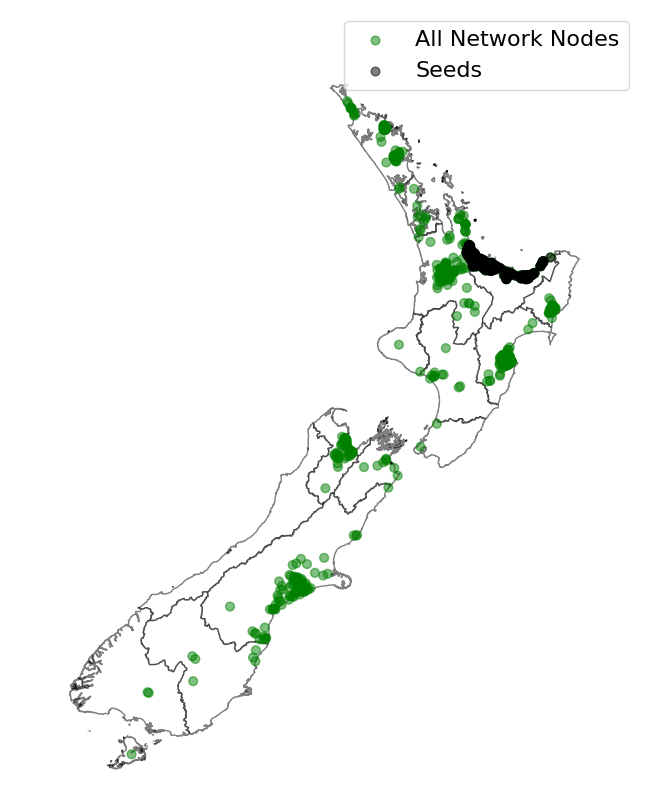

In [11]:
#f, ax = plt.subplots(figsize=(15, 20))
ax = gdf.plot(color="white",alpha=0.5,figsize=(10,10),edgecolor="black",aspect=1)
allnodes_df.plot(ax=ax,color="green",markersize=real_sizes,alpha=0.5)
#sourcenodes_df.plot(ax=ax,color="blue",markersize=sizes)
seednodes_df.plot(ax=ax,color="black",markersize=real_sizes,alpha=0.5)
ax.set_axis_off()

#outhubnodes_df.plot(ax=ax,figsize=(200,150),color="red",alpha=0.7,marker="x",markersize=sizes)
ax.set_xlim(165, 180)  # just a guess here
ax.set_ylim(-47.5,-33)
plt.legend(["All Network Nodes","Seeds"],fontsize=16)
plt.savefig("figs/full_network.png")


In [ ]:
prop_dat = pd.read_csv("../params/2024_prop_dat.csv")
inprop_lat = list(prop_dat["GPS_CENTRE_LATITUDE"])
inprop_long = list(prop_dat["GPS_CENTRE_LONGITUDE"])
source_lat,source_long = [],[]
proper_longs = {}
map_long = {}
map_lat = {}
source_long,source_lat = [],[]
for i,s in enumerate(seed_id):
    if s in hort_dat_ids:
        proper_longs[s] = (inprop_lat[i],inprop_long[i])

for m in seed_ids:
    map_long[m] = proper_longs[m]
    source_lat.append(map_long[m][0])
    source_long.append(map_long[m][1])
all_lat,all_long = [],[]
for s in seeds:
    all_lat.append(proper_longs[s][0])
    all_long.append(proper_longs[s][1])
#Color by if in static system they fit the model best

in_d = {"Latitude":source_lat,"Longitude":source_long}
in_df = pd.DataFrame(data=in_d)
all_d = {"Latitude":all_lat,"Longitude":all_long}
all_df = pd.DataFrame(data=all_d)

sourcenodes_df = geopandas.GeoDataFrame(in_df,geometry=geopandas.points_from_xy(in_df.Latitude,in_df.Longitude),crs="EPSG:4326")
allnodes_df = geopandas.GeoDataFrame(all_df,geometry=geopandas.points_from_xy(all_df.Latitude,all_df.Longitude),crs="EPSG:4326")

#polygon = box(150,200,-45,-35)
#ax = gdf.plot(color="white",alpha=0.5,edgecolor="black",aspect=1)
real_size = 50
all_size = 50
#gdf.plot(figsize=(100,500),alpha=0.5,legend=True)
sizes = [real_size for i in range(0,len(source_long))]
real_sizes = [all_size for i in range(0,len(inprop_lat))]

ax = gdf.plot(color="white",alpha=0.5,figsize=(10,10),edgecolor="black",aspect=1)
# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize tick locations (optional)
ax.set_xticks([175.5, 176, 176.5, 177, 177.5, 178])
ax.set_yticks([-38.25, -38, -37.75, -37.5, -37.4])
sourcenodes_df.plot(ax=ax,color="blue",markersize=sizes)
#allnodes_df.plot(ax=ax,color="black",markersize=real_sizes,alpha=0.05)
#outhubnodes_df.plot(ax=ax,figsize=(200,150),color="red",alpha=0.7,marker="x",markersize=sizes)
ax.set_xlim(175.5, 178)  # just a guess here
ax.set_ylim(-38.25,-37.4)
plt.legend(["Source Nodes","Seed Nodes"])
print("Number of source nodes: ",len(source_lat))
plt.savefig("source_map_zoomed.png")